In [1]:
import tensorflow as tf
import numpy as np
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, precision_recall_curve, roc_curve, roc_auc_score

from tensorflow import keras as K
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalMaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
#Pretrained Xception model in Keras, input shape set as 200,200,3, Removed top softmax layer
xception_model = K.applications.Xception(
    weights='imagenet',  
    input_shape=(200, 200, 3),
    include_top=False)

In [3]:
#Freeze or unfreeze base layer
xception_model.trainable=True

In [4]:
#Add a Max Pooling layer, followed by a sigmoid output layer
x = xception_model.output
x = GlobalMaxPooling2D()(x)
predictions = Dense(1, activation='sigmoid')(x)
model = Model(inputs=xception_model.input, outputs=predictions)

In [5]:
#Compiling model with Adam optimizer and binary crossentropy loss function
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [51]:
#This is only used when loading model weights to test other datasets
model.load_weights('celeb.h5') 

In [7]:
# Train Generator
train_datagen = ImageDataGenerator()

In [8]:
# Val Generator
val_datagen = ImageDataGenerator()

In [11]:
# Load training data
train_generator = train_datagen.flow_from_directory(
        'D:/data/Celeb-DF/CelebDF_train',  # this is the target directory  
        batch_size=16,
        class_mode='binary',
    shuffle=True)

Found 62704 images belonging to 2 classes.


In [12]:
# Load validation data (Set shuffle to False when purpose is to get metrics)
val_generator = val_datagen.flow_from_directory(
        'D:/data/facefor/FaceForensics_compressed/val200',  # this is the target directory  
        batch_size=16,
        class_mode='binary',
    shuffle=True)

Found 15675 images belonging to 2 classes.


In [ ]:
D:/data/facefor/FaceForensics_compressed/val200
D:/data/Deepfake Detection Challenge/dfdc_train_part_0/DFDC val
D:/data/Celeb-DF/CelebDF_val

In [52]:
val_generator = val_datagen.flow_from_directory(
        'D:/data/Celeb-DF/CelebDF_val',  # this is the target directory  
        batch_size=16,
        class_mode='binary',
shuffle=False)

Found 15675 images belonging to 2 classes.


In [ ]:
celeb2.h5
dfdc2.h5
Xception15epochs.h5

In [13]:
#Model is trained for 15 epochs, weights are saved
model.fit(x=train_generator, 
    epochs=15,
    verbose=1,
    shuffle=True,
    validation_data = val_generator
)
model.save_weights('celeb2.h5') 

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 3919 steps, validate for 980 steps
Epoch 1/15
3919/3919 [==============================] - 1563s 399ms/step - loss: 0.1243 - accuracy: 0.9528 - val_loss: 0.2414 - val_accuracy: 0.9028
Epoch 2/15
3919/3919 [==============================] - 1451s 370ms/step - loss: 0.0435 - accuracy: 0.9856 - val_loss: 0.3868 - val_accuracy: 0.9163
Epoch 3/15
3919/3919 [==============================] - 1430s 365ms/step - loss: 0.0293 - accuracy: 0.9899 - val_loss: 0.6812 - val_accuracy: 0.8560
Epoch 4/15
3919/3919 [==============================] - 1423s 363ms/step - loss: 0.0220 - accuracy: 0.9924 - val_loss: 0.7264 - val_accuracy: 0.8205
Epoch 5/15
3919/3919 [==============================] - 1426s 364ms/step - loss: 0.0150 - accuracy: 0.9948 - val_loss: 0.1203 - val_accuracy: 0.9656
Epoch 6/15
3919/3919 [==============================] - 1342s 343ms/step - loss: 0.0131 - accuracy: 0.9955 - val_loss: 0.4918 - val_accuracy: 0.8807
Epoch 7/15


In [33]:
#Model can be evaluated on other datasets.
model.evaluate(
    x=val_generator,
    verbose=1,
)

  ...
    to  
  ['...']
980/980 [==============================] - 65s 67ms/step - loss: 5.2009 - accuracy: 0.7162


[5.2009124352131595, 0.7161723]

In [53]:
#Model predictions can be saved (similar to evaluate) for use in calculation of metrics, Make sure to set Val Generator shuffling to False
preds = model.predict(
    x=val_generator,
    verbose=1,
    steps=None,
    callbacks=None,
    max_queue_size=10,
    workers=1,
    use_multiprocessing=False,
)

980/980 [==============================] - 64s 66ms/step


In [ ]:
preds, truth = np.

In [46]:
preds_rounded = np.round(preds)

In [47]:
cm = confusion_matrix(val_generator.classes, preds_rounded)

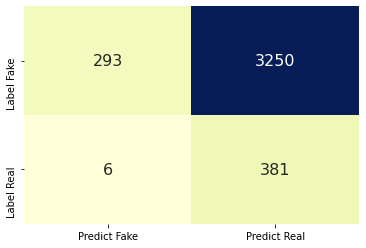

In [48]:
df_cm = pd.DataFrame(cm, index=["Label Fake", "Label Real"], columns=["Predict Fake", "Predict Real"])
sn.heatmap(df_cm, annot=True, cmap="YlGnBu", fmt="g", annot_kws={"size": 16}, cbar=False) # font size
plt.show()

In [13]:
tn, fp, fn, tp = confusion_matrix(val_generator.classes, preds_rounded).ravel()

In [14]:
print(classification_report(val_generator.classes, preds_rounded,digits=5))

              precision    recall  f1-score   support

           0    0.97142   0.96362   0.96750     11215
           1    0.91033   0.92870   0.91942      4460

    accuracy                        0.95368     15675
   macro avg    0.94087   0.94616   0.94346     15675
weighted avg    0.95403   0.95368   0.95382     15675



In [30]:
#Celeb
fpr3, tpr3, th3 = roc_curve(val_generator.classes, preds)

In [16]:
#FF
fpr, tpr, th = roc_curve(val_generator.classes, preds)

In [48]:
roc_auc_score(val_generator.classes, preds_rounded)

0.9946087913618427

In [25]:
#DFDC
fpr2, tpr2, th2 = roc_curve(val_generator.classes, preds)

In [35]:
dfdcfpr = pd.read_csv('C:/Users/harry/Desktop/Project/Surajit parts/dfdcfpr.csv')
dfdcfpr = dfdcfpr.to_numpy()

In [36]:
dfdctpr = pd.read_csv('C:/Users/harry/Desktop/Project/Surajit parts/dfdctpr.csv')
dfdctpr = dfdctpr.to_numpy()

In [15]:
celebfpr

array([[0.        ],
       [0.        ],
       [0.00314465],
       [0.00314465],
       [0.00628931],
       [0.00628931],
       [0.00943396],
       [0.00943396],
       [0.01257862],
       [0.01257862],
       [0.02201258],
       [0.02201258],
       [0.02515723],
       [0.02515723],
       [0.03144654],
       [0.03144654],
       [0.03459119],
       [0.03459119],
       [0.0408805 ],
       [0.0408805 ],
       [0.04402516],
       [0.04402516],
       [0.04716981],
       [0.04716981],
       [0.05660377],
       [0.05660377],
       [0.06289308],
       [0.06289308],
       [0.07861635],
       [0.07861635],
       [0.08805031],
       [0.10062893],
       [0.10691824],
       [0.10691824],
       [0.11006289],
       [0.11006289],
       [0.11320755],
       [0.11320755],
       [0.11949685],
       [0.11949685],
       [0.13207547],
       [0.13207547],
       [0.1509434 ],
       [0.1509434 ],
       [0.16666667],
       [0.16666667],
       [0.17295598],
       [0.172

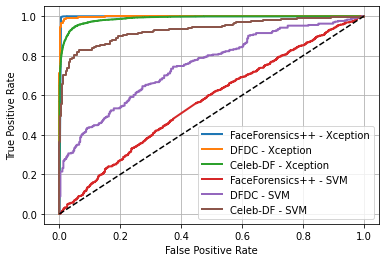

In [38]:
plt.plot(fpr, tpr, linewidth=2, label="FaceForensics++ - Xception")
plt.plot(fpr2,tpr2,linewidth=2, label="DFDC - Xception")
plt.plot(fpr3,tpr3,linewidth=2, label="Celeb-DF - Xception")
plt.plot(fffpr, fftpr, linewidth=2, label="FaceForensics++ - SVM")
plt.plot(dfdcfpr, dfdctpr, linewidth=2, label="DFDC - SVM")
plt.plot(celebfpr, celebtpr, linewidth=2, label="Celeb-DF - SVM")
plt.plot([0,1], [0,1], 'k--')
plt.legend(loc="lower right")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.grid(True)
plt.show()

In [43]:
#FF
precision, recall, thresholds = precision_recall_curve(val_generator.classes, preds)

In [49]:
#DFDC
precision2, recall2, thresholds2 = precision_recall_curve(val_generator.classes, preds)

In [54]:
#Celeb
precision3, recall3, thresholds3 = precision_recall_curve(val_generator.classes, preds)

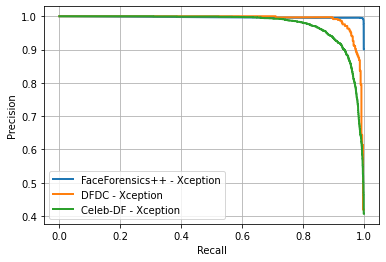

In [55]:

plt.plot(recall, precision, linewidth=2, label="FaceForensics++ - Xception")
plt.plot(recall2, precision2, linewidth=2, label="DFDC - Xception")
plt.plot(recall3, precision3, linewidth=2, label="Celeb-DF - Xception")
plt.grid(True)
plt.legend(loc="lower left")
#ax.set_xlim(self, left=None, right=None, emit=True, auto=False, xmin=None, xmax=1.01)
#ax.set_xlim(right=1.2)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()